In [23]:
import numpy as np 
import pandas as pd
import math
import matplotlib.pyplot as plt 
import scipy.optimize
from scipy.stats import poisson, chi2, kstwobign
from scipy.stats import moment

import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [24]:
n = 100
columns = [i for i in range(0, 10)]
index = ["Погрешность"]
data_df = pd.DataFrame(columns=columns, index = pd.Index(index))
data_df.loc["Погрешность"] = np.array([5, 8, 6, 12, 14, 18, 11, 6, 13, 7])
data_df

,0,1,2,3,4,5,6,7,8,9
Погрешность,5,8,6,12,14,18,11,6,13,7


In [25]:
p = 1/10 # Для равномерного распределения для дискретных значений
delta = 0
for i in range(0, 10): delta += (n*p - data_df.loc["Погрешность", i])**2 / (n*p)
delta

16.4

In [26]:
sf = chi2.sf(delta, 9)
print(f"p_value = {sf}")

p_value = 0.058984030544419586


p-value > 0.05 => Нет оснований отвергнуть H0

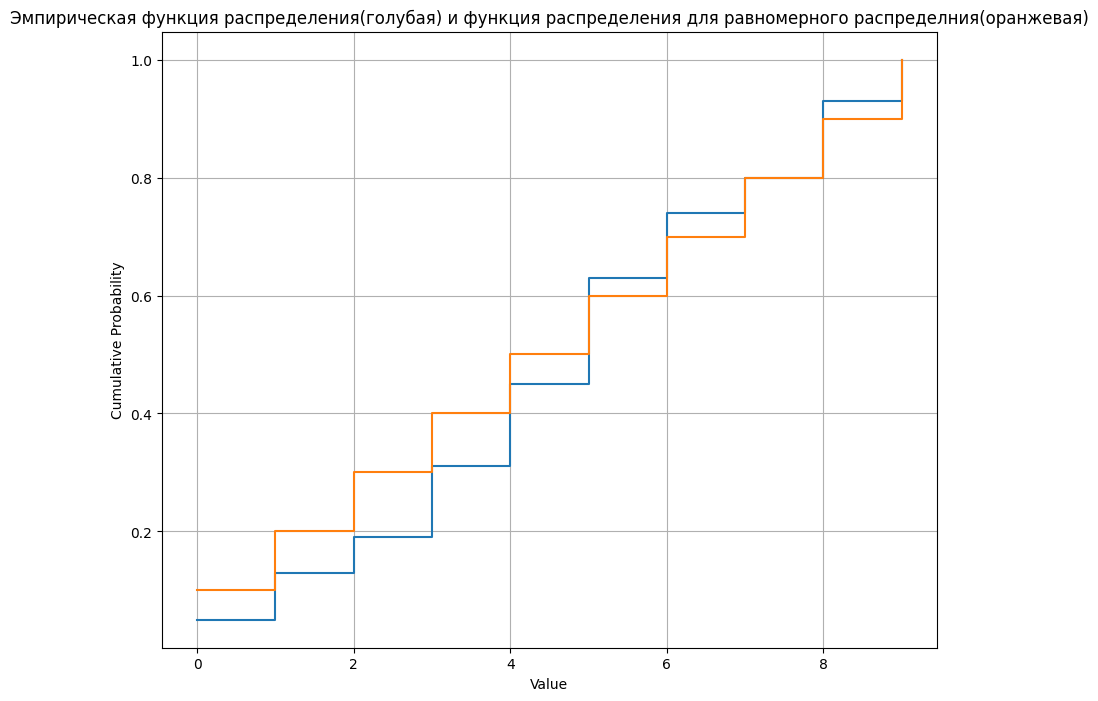

In [27]:
p_even = [i/10 for i in range(1, 11)]
p_empirical = [data_df.loc["Погрешность", 0]/n]
for i in range(1, 10):
    p_empirical.append(p_empirical[i-1] + data_df.loc["Погрешность", i]/n)

# Plotting
plt.step(columns, p_empirical, where='post')
plt.step(columns, p_even, where="post")
plt.title('Эмпирическая функция распределения(голубая) и функция распределения для равномерного распределния(оранжевая)')
plt.xlabel('Value')
plt.ylabel('Cumulative Probability')
plt.grid(True)
plt.show()

In [28]:
print(f"tp_even = \t{p_even}")
print(f"p_empirical = \t{p_empirical}")

tp_even = 	[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
p_empirical = 	[0.05, 0.13, 0.19, 0.31, 0.45, 0.63, 0.74, 0.8, 0.93, 1.0]


In [29]:
delta = 0
delta = max(abs(p_even[0] - 0), abs(p_even[0] - p_empirical[0]))
for i in range(1, 10):
    delta = max(delta, abs(p_even[i] - p_empirical[i-1]), abs(p_even[i] - p_empirical[i]))
delta *= math.sqrt(n)
delta

2.1

In [30]:
kolmogorov_dist = kstwobign
sf_value = kolmogorov_dist.sf(delta)
print(f"P(K > {delta}) = {sf_value}")

P(K > 2.1) = 0.0002954967204631142


p-value <= 0.05 => Отвергаем H0 (результаты значимы)